In [1]:
import sys
sys.path.append("../../../")

import pandas as pd
from preprocessing import preprocessing_text_with_lemma
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Rizha
[nltk_data]     Alfianita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rizha
[nltk_data]     Alfianita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
fix_file = "../../../dataset/fix_data.csv"
fix_df = pd.read_csv(fix_file)

In [3]:
fix_df['preprocessed_text'] = fix_df['question_text'].apply(preprocessing_text_with_lemma)

In [4]:
X = fix_df['preprocessed_text'].apply(lambda x: ' '.join(x))
y = fix_df['target']

In [5]:
import sys
sys.path.append("..")

from KFold import KF

kf = KF(X, y, 0.2)
kf.split()

{0: 0.033, 1: 0.967}
{0: 0.982, 1: 0.018}
{0: 0.994, 1: 0.006}
{0: 0.862, 1: 0.138}
{0: 0.0, 1: 1.0}
{0: 0.884, 1: 0.116}
{0: 0.497, 1: 0.502}
{0: 0.305, 1: 0.695}
{0: 0.488, 1: 0.512}
{0: 0.314, 1: 0.686}
{0: 0.102, 1: 0.898}
{0: 0.207, 1: 0.793}
{0: 0.235, 1: 0.765}
{0: 0.932, 1: 0.068}
{0: 0.952, 1: 0.048}
{0: 0.007, 1: 0.993}
{0: 0.99, 1: 0.01}
{0: 0.967, 1: 0.033}
{0: 0.08, 1: 0.92}
{0: 0.004, 1: 0.996}
{0: 0.697, 1: 0.303}
{0: 0.0, 1: 1.0}
{0: 0.012, 1: 0.988}
{0: 0.005, 1: 0.995}
{0: 0.06, 1: 0.94}
{0: 0.002, 1: 0.998}
{0: 0.012, 1: 0.988}
{0: 0.276, 1: 0.724}
{0: 0.025, 1: 0.975}
{0: 0.001, 1: 0.999}
{0: 0.017, 1: 0.983}
{0: 0.001, 1: 0.999}
{0: 0.994, 1: 0.006}
{0: 0.959, 1: 0.041}
{0: 0.295, 1: 0.705}
{0: 0.652, 1: 0.348}
{0: 0.052, 1: 0.948}
{0: 0.115, 1: 0.885}
{0: 0.452, 1: 0.548}
{0: 0.529, 1: 0.471}
{0: 0.071, 1: 0.929}
{0: 0.021, 1: 0.979}
{0: 0.449, 1: 0.551}
{0: 0.158, 1: 0.842}
{0: 0.338, 1: 0.662}
{0: 0.004, 1: 0.996}
{0: 0.015, 1: 0.985}
{0: 0.012, 1: 0.988}
{0: 0.

In [6]:
print("Cross-validation scores:", kf.scores)
print("Mean cross-validation score:", round(np.mean(kf.scores), 3))

Cross-validation scores: [0.821, 0.789, 0.823, 0.806, 0.806, 0.812, 0.809, 0.809, 0.819, 0.797]
Mean cross-validation score: 0.809


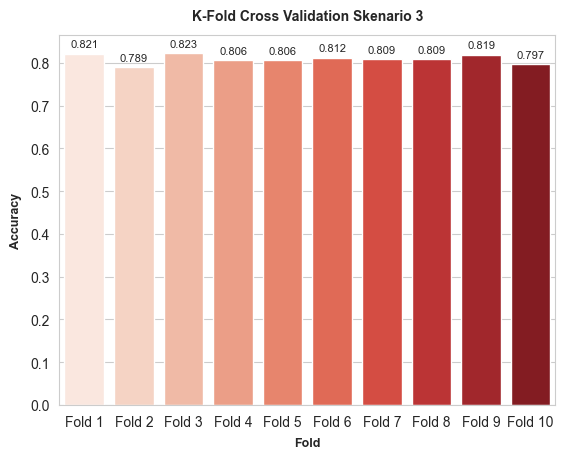

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

scenarios = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6', 'Fold 7', 'Fold 8', 'Fold 9', 'Fold 10']
accuracy_values = kf.scores

# Define custom color palette with shades of red and reverse it
custom_palette = sns.color_palette("Reds_r", len(scenarios))[::-1]

sns.set_style('whitegrid')
ax = sns.barplot(x=scenarios, y=accuracy_values, palette=custom_palette)
plt.title('K-Fold Cross Validation Skenario 3', fontsize=10, fontweight='bold', pad=11)
plt.xlabel('Fold', fontsize=9, fontweight='semibold', labelpad=6)  # Add x-axis title
plt.ylabel('Accuracy', fontsize=9, fontweight='semibold', labelpad=6)   # Add y-axis title

# Add numeric values above the bars
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=8)

plt.show()